In [264]:
import numpy as np
import time

time_for_diff_files=[]
time_for_diff_files0=[]
n_0=[]

In [265]:
#create initial state 
#create list that keeps track of the state amplitudes
def initial(n):
    amp=[1]
    states=[np.zeros(n)]
    return states,amp

#X gate
def X(b,j):
    for k in b:
        if k[j]==0:
            k[j]=1
        elif k[j]==1:
            k[j]=0
        else:
            print('error')
    return b

#Hadamard gate
def H(b,j,amp):
    b_new=[]
    amp_new=[]
    for n,k in enumerate(b):
        if(k[j] == 1):
            amp[n]=amp[n]*(-1/np.sqrt(2))
            l=np.array(k)
            l[j]=0
            b_new.append(l)
            amp_new.append(-amp[n])
        
        elif(k[j] == 0):
            amp[n]=amp[n]*(1/np.sqrt(2))
            l=np.array(k)
            l[j]=1.0
            b_new.append(l)
            amp_new.append(amp[n])
        
        else:
            print('error')
    
    #combine amplitudes of identical states 
    for m,p in enumerate(b):
        for f,s in enumerate(b_new):
            if np.allclose(s,p)==True:
                amp[m]+=amp_new[f]
                amp_new.pop(f)
                b_new.pop(f)
                
            else:
                continue
     
    for l in range(len(b_new)):
        if len(b_new)!=0:
            b.append(b_new[l])
            amp.append(amp_new[l])
        else:
            break
            
    for p,z in enumerate(amp):
        if np.allclose(np.array([z]),np.array([0]),atol=1e-08)==True:
            amp.pop(p)
            b.pop(p)
        else:
            continue
            
    
    
    return b,amp


        
#T gate        
def T(b,j,amp):
    #print(b[0])
    for n,k in enumerate(b):
        #print(k,'this')
        if(k[j] == 1):
            amp[n]=amp[n]* np.exp(1.0j*np.pi*0.25)
        else:
            continue
    return b,amp
        
#T dagger gate        
def D(b,j,amp):
    for n,k in enumerate(b):
        if(k[j] == 1):
            amp[n] =amp[n]* np.exp(-1.0j*np.pi*0.25)
        else:
            continue
    return b,amp

#CNOT gate
def CNOT(b,control,target):
    for n,k in enumerate(b):
        if(k[control] == 1):
            if k[target]==0:
                k[target]=1
            elif k[target]==1:
                k[target]=0
            else:
                print('error')
        else:
            continue
    return b
            


            


In [286]:
#list containing names of all 14 files given in instructions
all_files=['miller_11.qasm','decod24-v2_43.qasm','one-two-three-v3_101.qasm','hwb5_53.qasm','alu-bdd_288.qasm','f2_232.qasm','con1_216.qasm','mini_alu_305.qasm','rd84_142.qasm','wim_266.qasm','cm152a_212.qasm','squar5_261.qasm','sym6_316.qasm','cnt3-5_179.qasm']
#start_time = time.time()

#INPUT
#name of file to read
file_name = all_files[13]
f = open(file_name)
ff = f.read()
str_lines = ff.split(";\n")

num_qubits=str_lines[2]

#number of qubits to simulate
n0 = num_qubits.split('[')[1].split(']')[0]

#create initial state and amplitude list
state, A =initial(int(n0))

#read file and complete executions
for lines in str_lines:
    k=lines.split()
    
    if len(k)!=0:
        #apply hadamard if line starts with 'h'
        if k[0] == 'h':
            #print(k[1])
            #print(state,A)
            p = k[1].split('[')[1].split(']')[0]
        
            state,A=H(state,int(p),A)
            #print(state,A)
        #apply CNOT if line starts with 'cx
        elif k[0] == 'cx':
            c = k[1].split('[')[1].split(']')[0]
            t = k[1].split(']')[1].split('[')[1]
        
            state=CNOT(state,int(c),int(t))
        
        #apply T if line starts with 't'
        elif k[0] == 't':
            p = k[1].split('[')[1].split(']')[0]
            
            state,A=T(state,int(p),A)
        
        #apply T dagger if line starts with 'tdg'
        elif k[0] == 'tdg':
            p = k[1].split('[')[1].split(']')[0]

            state,A=D(state,int(p),A)
        
        #apply X if line starts with 'x'
        elif k[0] == 'x':
            p = k[1].split('[')[1].split(']')[0]
            state=X(state,int(p))
        
        else :
            continue
            
    #if line does not indicate gate operation continue to next line
    else:
        continue
        
    
                    
    
    
    
    

output=np.zeros(int(n0))
#obtain final state by multiplying each state with its amplitude and taking the sum
for i,vec in enumerate(state):
    output=+A[i]*vec

final_out=[]

for k in output:
    if k==0:
        final_out.append('0')
    else:
        final_out.append('1')

#OUTPUT
print('Result:'+str(final_out))

#time_for_diff_files0.append(time.time()-start_time)
#n_0.append(n0)



    
    
        
  

Result:['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


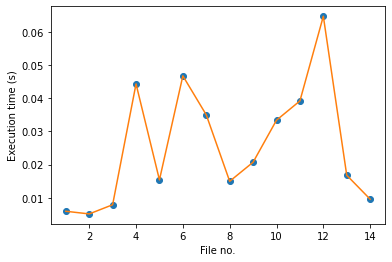

In [250]:
import matplotlib.pyplot as plt
#execution time of files
plt.plot(np.arange(1,15,1),time_for_diff_files,'o')
plt.plot(np.arange(1,15,1),time_for_diff_files)
plt.xlabel('File no.')
plt.ylabel('Execution time (s)')
plt.savefig("quant_sim_execution.pdf")

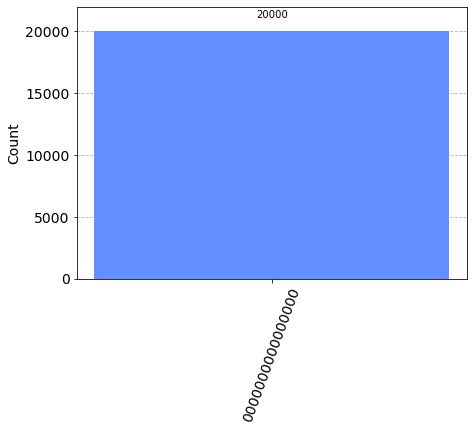

In [251]:
from qiskit import QuantumCircuit, Aer, execute

#qiskit simulator to check results

sim = Aer.get_backend('aer_simulator')
shots=20000
new_qc = QuantumCircuit.from_qasm_file(all_files[0])
for i in range(16):
    new_qc.measure(i,i)

qc_trans = transpile(new_qc, sim)
count_qc = sim.run(qc_trans, shots=shots).result().get_counts()
plot_histogram(count_qc)

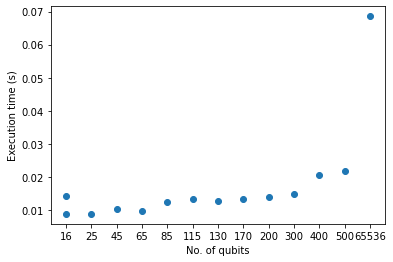

In [284]:
#execution time as number of qubits increase
plt.plot(n_0,time_for_diff_files0,'o')
plt.xlabel('No. of qubits')
plt.ylabel("Execution time (s)")
plt.savefig("qubits_exeution.pdf")